In [33]:
#Importing The Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go

In [34]:
#Loading the data
f=pd.read_csv("data2.csv")
v=pd.read_csv('data.csv')
print(f)

      Year   Estimate  Lower bound  Upper bound
0   1990.5  93.227051    91.951447    94.738926
1   1991.5  91.951419    90.730401    93.376075
2   1992.5  90.735946    89.582848    92.076864
3   1993.5  89.518929    88.430232    90.816738
4   1994.5  88.436744    87.346571    89.700076
5   1995.5  86.531058    85.469465    87.790039
6   1996.5  84.780684    83.739373    86.045951
7   1997.5  82.815649    81.774668    84.053094
8   1998.5  80.699453    79.688879    81.924101
9   1999.5  78.416859    77.419666    79.626546
10  2000.5  75.826638    74.851453    77.013186
11  2001.5  73.189155    72.229395    74.346003
12  2002.5  70.478631    69.524949    71.611834
13  2003.5  67.784293    66.837041    68.891831
14  2004.5  65.381065    64.445315    66.490470
15  2005.5  62.538418    61.601463    63.634204
16  2006.5  60.045125    59.115172    61.141893
17  2007.5  57.605642    56.702202    58.730625
18  2008.5  55.486272    54.589878    56.635013
19  2009.5  53.020284    52.114885    54

In [35]:
#Getting specific Rows to work on
f=f[['Year','Estimate']]
print(v.head())
f.head()

   ID                   Country                  Indicator    Sex  \
0   2                   Somalia  Under-five mortality rate  Total   
1   3                   Nigeria  Under-five mortality rate  Total   
2   4                      Chad  Under-five mortality rate  Total   
3   5              Sierra Leone  Under-five mortality rate  Total   
4   6  Central African Republic  Under-five mortality rate  Total   

  Wealth Quintile  2020(Mortality Rate)        2019        2018        2017  \
0           Total            114.618206  118.262590  121.955801  126.126585   
1           Total            113.773078  116.935870  119.901150  122.534346   
2           Total            110.047037  113.530238  117.316671  121.085737   
3           Total            107.830945  111.890615  116.230972  120.725995   
4           Total            102.996664  106.622354  111.052260  114.492677   

         2016  ...        1994        1993        1992        1991  \
0  130.300147  ...  172.709553  172.9435

,Year,Estimate
0,1990.5,93.227051
1,1991.5,91.951419
2,1992.5,90.735946
3,1993.5,89.518929
4,1994.5,88.436744


In [36]:
#Checking if their is some unsuable row
f.isna().sum()

Year        0
Estimate    0
dtype: int64

In [37]:
#Getting The number of Rows And Colums
f.shape

(31, 2)

In [38]:
f.describe()

,Year,Estimate
count,31.000000,31.000000
mean,2005.500000,63.947991
std,9.092121,19.105848
min,1990.500000,36.632947
25%,1998.000000,46.366493
50%,2005.500000,62.538418
75%,2013.000000,81.757551
max,2020.500000,93.227051


In [39]:
#Representing the Mortality Rate on the World Map
w= v.groupby(["Country"])["2020(Mortality Rate)"].mean()
data = dict(type = 'choropleth',
            locations = w.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= w.index,
            z=w,
            colorbar = {'title':'2020 Under 5 Mortality Rate', 'len':350,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Under 5 Mortality Rate of 2020(Death Per 1000 Births) Around The World")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

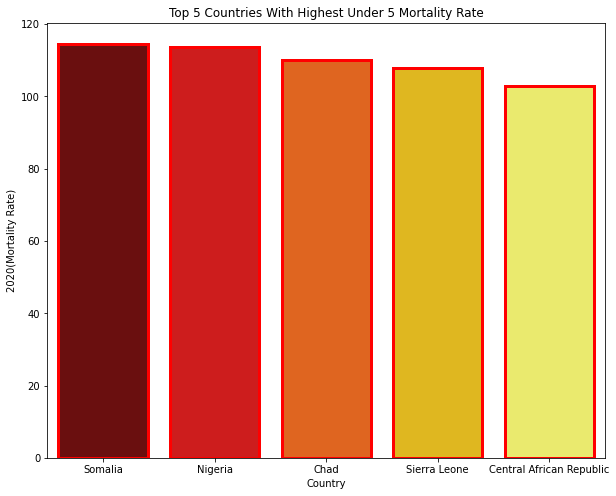

In [40]:
q=v.iloc[0:5]
sns.barplot(x='Country',y='2020(Mortality Rate)',data=q,ci=None,palette='hot',edgecolor='red',lw=3).set(title='Top 5 Countries With Highest Under 5 Mortality Rate');


In [41]:
#Dividing data into independent and dependent varible
x=np.array(f['Year']).reshape(-1,1)
y=np.array(f['Estimate']).reshape(-1,1)


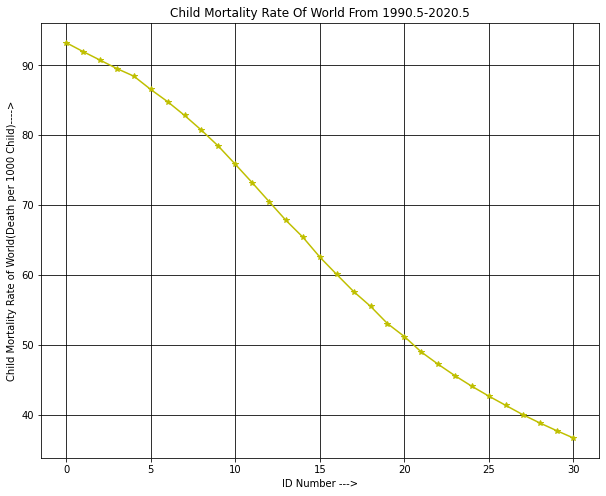

In [42]:
#Plotting the Graph using matplotlib
from matplotlib import rcParams
rcParams['figure.figsize']=10,8
plt.plot(y,'-y*');
plt.grid(True,color='k');
plt.title("Child Mortality Rate Of World From 1990.5-2020.5")
plt.ylabel("Child Mortality Rate of World(Death per 1000 Child)---->")
plt.xlabel("ID Number --->");

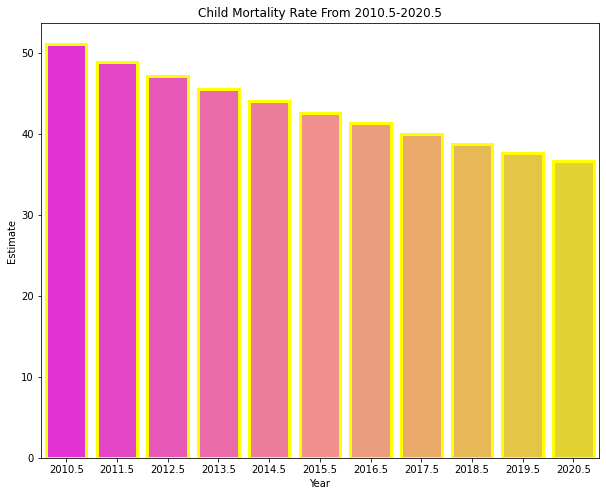

In [43]:
#Bar Graph of Mortality From 2010-2020
j=f.iloc[20:32]
sns.barplot(x='Year',y='Estimate',data=j,ci=None,palette='spring',edgecolor='yellow',lw=3).set(title='Child Mortality Rate From 2010.5-2020.5');

In [44]:
# Getting the square of ID for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(x)
#print(x)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy= model.score(x,y)
print('Accuracy Of Linear Regression is :',round(accuracy*100,3))

Accuracy Of Linear Regression is : 99.206


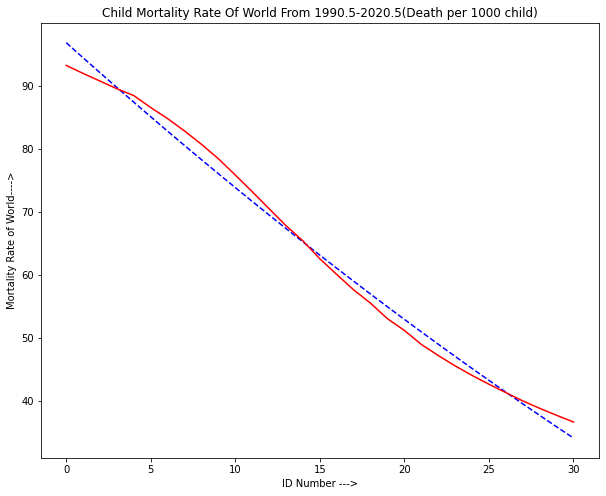

In [45]:
#Plot between Actual and Predicted Data
y0=model.predict(x)
plt.plot(y0,'--b');
plt.plot(y,'-r');
plt.title("Child Mortality Rate Of World From 1990.5-2020.5(Death per 1000 child)")
plt.ylabel("Mortality Rate of World---->")
plt.xlabel("ID Number --->");

In [46]:
#Correlation
model.coef_

array([[ 0.00000000e+00, -4.38671551e+01,  1.04153086e-02]])

In [47]:
#Correlation Coefficient
f.corr()

,Year,Estimate
Year,1.000000,-0.995236
Estimate,-0.995236,1.000000


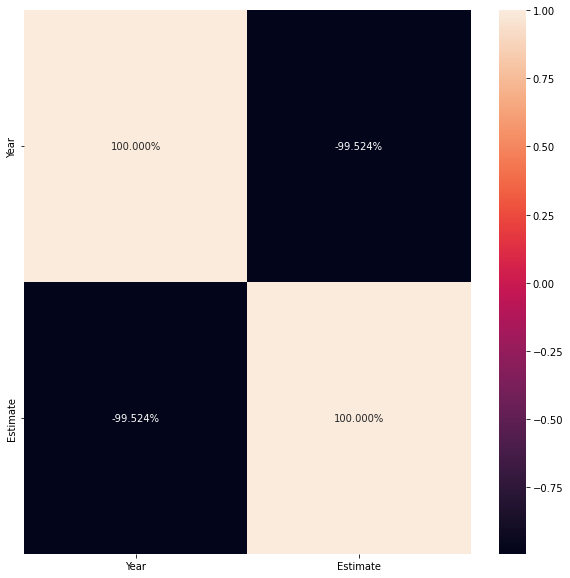

In [48]:
#Visualize the data correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(f.corr(),annot=True,fmt=".03%");

In [49]:
#Actual Values
print("Actual Values :")
print(y.ravel())
#Predicted Values
print("Predicted Values :")
pred=model.predict(x)
print(pred.ravel())

Actual Values :
[93.22705099 91.9514189  90.7359457  89.51892888 88.43674377 86.53105769
 84.7806844  82.81564864 80.69945281 78.41685903 75.82663817 73.18915507
 70.47863093 67.78429271 65.38106469 62.53841829 60.04512478 57.60564202
 55.48627238 53.02028385 51.16101064 48.95309318 47.19000083 45.54298591
 44.02807404 42.62635211 41.30124689 39.98353831 38.80316143 37.69598301
 36.63294664]
Predicted Values :
[96.82849395 94.43509775 92.06253218 89.71079722 87.37989288 85.06981915
 82.78057604 80.51216355 78.26458168 76.03783042 73.83190978 71.64681976
 69.48256036 67.33913157 65.2165334  63.11476585 61.03382891 58.9737226
 56.93444689 54.91600181 52.91838734 50.9416035  48.98565026 47.05052765
 45.13623565 43.24277427 41.37014351 39.51834336 37.68737383 35.87723492
 34.08792663]


In [50]:
#Prediction
years=0
print(f'Prediction -Morality Rate Of World {2020.5+years} will be:',end=' ')
print(model.predict(poly.fit_transform([[2020.5+years]])))

Prediction -Morality Rate Of World 2020.5 will be: [[34.08792663]]


In [51]:
#dumping a data
from joblib import dump
dump(model,"Child Mortality Data Visualization And Prediction-World.joblib")

['Child Mortality Data Visualization And Prediction-World.joblib']

In [52]:
import pickle
pickle.dump(model,open('model.sav','wb'))

## Whenever we save a model then we can just reload our model for new data and we do not have to retrain our model again. We just need to perform the training process on the new data. For the above case:

from sklearn.preprocessing import PolynomialFeatures <br>
poly = PolynomialFeatures(degree=2) <br>
x = poly.fit_transform(x) <br>
#print(x) <br>

## Just perform the above process